### Introduction:
Spark Funds is an asset management company and they wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

**Business objective:** 

The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

**Goals of data analysis:**
Your goals are divided into three sub-goals:
-	Investment type analysis: Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so that Spark Funds can choose the type that is best suited for their strategy.

- Country analysis: Identifying the countries which have been the most heavily invested in the past. These will be Spark Funds’ favourites as well.

- Sector analysis: Understanding the distribution of investments across the eight main sectors. (Note that we are interested in the eight 'main sectors' provided in the mapping file. The two files — companies and rounds2 — have numerous sub-sector names; hence, you will need to map each sub-sector to its main sector.)

**Data Set:** There are 3 datasets for this analysis:

1. Company details
companies: A table with basic data of companies.

2. Funding round details: 
rounds2:

3. Sector Classification:
mapping.csv: This file maps the numerous category names in the companies table (such 3D printing, aerospace, agriculture, etc.) to eight broad sector names. The purpose is to simplify the analysis into eight sector buckets, rather than trying to analyse hundreds of them.




## **Checkpoint 1:**


In [1]:
#Importing the necessary libraries
#Importing Numerical Libraries
import numpy as np

#To handle data in form of rows and columns
import pandas as pd

#To enable plotting graphs in jupyter notebook
import matplotlib.pyplot as plt
%matplotlib inline

#Importig library for statistical graphs
import seaborn as sns

** 1:Load the companies and rounds data into two data frames and name them companies and rounds2 respectively.**

In [2]:
#loading the dataset companies in pandas dataframe using the function function read_csv()
companies = pd.read_csv("companies.txt",sep="\t", encoding = "ISO-8859-1")

#head() is used to print the first five rows. By default it will print you first five rows  or you can give a specific number
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
#loading the dataset round2 into the pandas dataframe using read_csv()
rounds2 = pd.read_csv("rounds2.csv",encoding='unicode_escape')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
#shape is used to check the number of rows and columns in the dataset
companies.shape

(66368, 10)

**Description: There are 66368 number of observations and 10 attributes in companies dataset**

In [5]:
#shape is used to check the number of rows and columns in the dataset
rounds2.shape

(114949, 6)

**Description: There are 114949 observations and 6 attributes in the dataset round**

In [6]:
#info() is used to Check the datatypes of each attribute
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


**Description : As we can see all the attributes are of object type in the dataset companies**

In [66]:
#info() is used to Check the datatypes of each attribute
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


**Description : In round dataset 5 attributes are of object type and 1 attribute(raised_amount_usd) are of numeric type.**

In [67]:
#The describe() function computes a summary of statistics pertaining to the DataFrame columns. 
#This function gives the mean, std and IQR values. And, 
#function excludes the character columns and given summary about numeric columns
#.. Takes the list of values; by default, 'numberic
companies.describe().T


,count,unique,top,freq
permalink,66368,66368,/Organization/Consumerbell,1
name,66367,66102,Peach,4
homepage_url,61310,61191,http://www.askforoffer.com,5
category_list,63220,27296,Software,3995
status,66368,4,operating,53034
country_code,59410,137,USA,37601
state_code,57821,311,CA,12900
region,58338,1092,SF Bay Area,8804
city,58340,5111,San Francisco,3526
founded_at,51147,3978,01-01-2012,2730


In [68]:
rounds2.describe().T

,count,mean,std,min,25%,50%,75%,max
raised_amount_usd,94959.0,1.042687e+07,1.148212e+08,0.0,322500.0,1680511.0,7000000.0,2.127194e+10


**Ques 1:How many unique companies are present in rounds2?**


In [69]:
#Converting the primary key permalink to lower case for further merging of data
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()
companies["permalink"] = companies["permalink"].str.lower()


In [70]:
# unique companies count in round2 file
uniq_rounds2=len(rounds2["company_permalink"].unique())
uniq_rounds2

66370

**Ans: There are 66370 unique companies in round2 dataset**

**Ques 2:How many unique companies are present in companies?**

In [71]:
# unique companies count in compaines file
uniq_companies=len(companies.permalink.unique())
uniq_companies

66368

**Ans: There are 66368 unique companies in companies dataset**

**Ques 3: In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.**

In [72]:
#oolean = not companies["permalink"].is_unique

boolean = companies['permalink'].duplicated().any()

boolean

False

In [73]:
#boolean1 = not companies["name"].is_unique

boolean1 = companies['name'].duplicated().any()

boolean1

True

In [74]:
boolean2 = companies['country_code'].duplicated().any()

boolean2

True

In [75]:
boolean3 = companies['founded_at'].duplicated().any()

boolean3

True

**Ans:** A unique key is a set of one or more than one fields/columns of a table that uniquely identify a record in a database table.Unique key is a constraint that is used to uniquely identify a tuple in a table. Multiple unique keys can present in a table. NULL values are allowed in case of a unique key. These can also be used as foreign keys for another table.
There are 10 columns in companies    dataset:
permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at .
as we can see from the above three outputs only **Permalink** does not contain duplicate values so we can make this column as a unique key column

**Ques 4 :Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N**

In [7]:
companies['permalink'] = companies['permalink'].str.lower()
# now the unique count should be same without having to use lower
print(len(companies.permalink.unique()))

66368


In [8]:

rounds2['permalink'] = rounds2['company_permalink'].str.lower()
# now the unique count should be same without having to use lower
print(len(rounds2.permalink.unique()))

66370


**Ans : (66370 - 66368) So there are 2 compaines information missing that have information in rounds2 table.**

**Ques5:Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?**

After this, you will need to work only with the master frame.

In [32]:
#Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. 
#Name the merged frame master_frame.
master_frame = pd.merge(rounds2, companies, how = 'left', left_on = 'company_permalink', right_on = 'permalink')
len(master_frame.index)

114949

In [33]:
#printing the first few  of master_frame
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink_x,permalink_y,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [34]:

#checking the number of rows and columns in new dataframe
master_frame.shape

(114949, 17)

**There are 114942 obeservations in the dataframe master_frame**

### Data cleaning: 
Before we start our analysis we have to clean and preprocess the data.
- Inspecting Null Values
- Dropping unnecessary columns
- Dropping unnecessary rows

In [35]:
#checking the presence of missing values by using isnull()
master_frame.isnull().sum(axis=0)


company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink_x                    0
permalink_y                57476
name                       57477
homepage_url               60576
category_list              59127
status                     57476
country_code               61848
state_code                 62998
region                     62604
city                       62603
founded_at                 67748
dtype: int64

In [36]:
#Inspecting the Null values percentage , column-wise
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink_x                 0.00
permalink_y                50.00
name                       50.00
homepage_url               52.70
category_list              51.44
status                     50.00
country_code               53.80
state_code                 54.81
region                     54.46
city                       54.46
founded_at                 58.94
dtype: float64


There are null values in most of the columns of dataset. Before jumping to the methods of data imputation, we have to understand the reason why data goes missing.

- Missing at Random (MAR): Missing at random means that the propensity for a data point to be missing is not related to the missing data, but it is related to some of the observed data

- Missing Completely at Random (MCAR): The fact that a certain value is missing has nothing to do with its hypothetical value and with the values of other variables.

- Missing not at Random (MNAR): Two possible reasons are that the missing value depends on the hypothetical value (e.g. People with high salaries generally do not want to reveal their incomes in surveys) or missing value is dependent on some other variable’s value (e.g. Let’s assume that females generally don’t want to reveal their ages! Here the missing value in age variable is impacted by gender variable)

In the first two cases, it is safe to remove the data with missing values depending upon their occurrences, while in the third case removing observations with missing values can produce a bias in the model. So we have to be really careful before removing observations. 

It is always advisble that if the amount of missing data is less than 10% of total data than it is better to drop those than to impute .



**Dropping unnecessary columns:**
For Sparks Funds, we are mostly driving our analysis based on funding round type, category, country etc. Hence, so many columns present in the master_frame are not needed, we will drop those columns.

In [37]:
master_frame = master_frame.drop(['funding_round_code', 'funding_round_permalink', 'funded_at','permalink_x','permalink_y' ,'homepage_url',
                                 'state_code', 'region', 'city', 'founded_at','status'], axis = 1)

In [38]:
master_frame.shape

(114949, 6)

In [39]:
#Inspecting the Null values percentage again after deletion, column-wise
print(round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2))

company_permalink      0.00
funding_round_type     0.00
raised_amount_usd     17.39
name                  50.00
category_list         51.44
country_code          53.80
dtype: float64


**Dropping unnecessary rows:**
For the remaining columns of master_frame dataframe, we can see that there are columns which still have null counts, let's drop those rows and inspect the dataframe again.

In [40]:
#Dropping rows based on null columns
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull() |
                              master_frame['country_code'].isnull() |master_frame['name'].isnull()|
                             master_frame['category_list'].isnull())]

In [41]:
master_frame.shape

(44288, 6)

In [42]:
master_frame.isnull().sum()

company_permalink     0
funding_round_type    0
raised_amount_usd     0
name                  0
category_list         0
country_code          0
dtype: int64

In [43]:
#creating new dataframe from the existing one which we will use in checkpoint6(plot)
master_frame2= pd.DataFrame(master_frame)
master_frame2.shape

(44288, 6)

## Checkpoint 2: Funding Type Analysis

Spark Funds wants to choose one of these four investment types(venture, angel, seed, and private equity) for each potential investment they will make. So let's observe and see how many funding types are present in master_frame and then retain the rows with above-mentioned investment types.

In [44]:
#Observing the unique values in the column funding_round_type
master_frame.funding_round_type.value_counts()

venture                  24047
seed                     10397
debt_financing            3218
angel                     2240
grant                      984
private_equity             870
undisclosed                685
convertible_note           684
equity_crowdfunding        559
post_ipo_equity            309
product_crowdfunding       178
post_ipo_debt               75
non_equity_assistance       33
secondary_market             9
Name: funding_round_type, dtype: int64

**2.2 Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity

- Average funding amount of venture type
- Average funding amount of seed type
- Average funding amount of angel type
- Average funding amount of private_equity type

In [45]:
#Retaining the rows with only four investment types
master_frame = master_frame[(master_frame['funding_round_type'] == 'venture') 
                            | (master_frame['funding_round_type'] == 'seed')
                            | (master_frame['funding_round_type'] == 'angel')
                            | (master_frame['funding_round_type'] == 'private_equity')]
master_frame.head()


,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,IND
2,/organization/-qounter,seed,700000.0,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,CHN
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,CAN
10,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,USA


In [46]:
#Converting $ to million $.
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000
master_frame.head()

,company_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,venture,10.000000,#fame,Media,IND
2,/organization/-qounter,seed,0.700000,:Qounter,Application Platforms|Real Time|Social Network...,USA
4,/organization/0-6-com,venture,2.000000,0-6.com,Curated Web,CHN
8,/organization/0ndine-biomedical-inc,venture,0.719491,Ondine Biomedical Inc.,Biotechnology,CAN
10,/organization/0xdata,venture,20.000000,H2O.ai,Analytics,USA


In [47]:
#calculating average investment amount for each of the four funding types.
round(master_frame.groupby('funding_round_type').raised_amount_usd.mean(), 2)

funding_round_type
angel              1.08
private_equity    74.90
seed               0.76
venture           11.14
Name: raised_amount_usd, dtype: float64

In [48]:
#Retaining rows with only venture type. As Spark Funds wants to invest between 5 to 15 million USD per investment round
master_frame = master_frame[master_frame['funding_round_type'] == 'venture'] 

#Dropping the column 'funding_round_type' as it is going to be venture type this point forward
master_frame = master_frame.drop(['funding_round_type'], axis = 1)

## Checkpoint 3: Country Analysis
### Subtask 3.1: Analysing the countries based on investment amount

- Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

- For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

- Identify the top three English-speaking countries in the data frame top9.

In [49]:
top9 = master_frame.pivot_table(values = 'raised_amount_usd', index = 'country_code', aggfunc = 'sum')
top9 = top9.sort_values(by = 'raised_amount_usd', ascending = False)
top9 = top9.iloc[:9, ]
top9

,raised_amount_usd
country_code,
USA,196731.142293
CHN,20651.063524
GBR,9402.223720
IND,6848.315914
CAN,4817.453504
FRA,3855.279351
ISR,3438.122669
DEU,3200.701863
NLD,1992.621448


In [50]:
#Retaining rows with only USA, GBR and IND country_codes. As SparksFunds wants to invest in only top three English speaking countries.
master_frame = master_frame[(master_frame['country_code'] == 'USA')
                            | (master_frame['country_code'] == 'GBR')
                            | (master_frame['country_code'] == 'IND')]

## Cheeckpoint 4: Sector Analysis 1
### Subtask 4.1: Extract the primary sector of each category
Extract the primary sector value into category_list column. According to the business rule the first string before the vertical bar will be considered the primary sector.

In [51]:
#Extracting the primary vector value
master_frame['category_list'] = master_frame['category_list'].apply(lambda x: x.split('|')[0])

### 4.2: Map each primary sector to one of the eight main sectors
Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors)

In [52]:
#Reading mapping.csv file 
mapping = pd.read_csv('mapping.csv')
mapping.category_list = mapping.category_list.replace({'0':'na', '2.na' :'2.0'}, regex=True)
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


Reshaping the mapping dataframe to merge with the master_frame dataframe. Using melt() function to unpivot the table.

In [53]:

mapping = pd.melt(mapping, id_vars =['category_list'], value_vars =['Manufacturing','Automotive & Sports',
                                                              'Cleantech / Semiconductors','Entertainment',
                                                             'Health','News, Search and Messaging','Others',
                                                             'Social, Finance, Analytics, Advertising']) 
mapping = mapping[~(mapping.value == 0)]
mapping = mapping.drop('value', axis = 1)
mapping = mapping.rename(columns = {"variable":"main_sector"})
mapping.head()

,category_list,main_sector
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
7,Advanced Materials,Manufacturing
15,Agriculture,Manufacturing


In [54]:
master_frame = master_frame.merge(mapping, how = 'left', on ='category_list')
master_frame.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector
0,/organization/-fame,10.0,#fame,Media,IND,Entertainment
1,/organization/0xdata,20.0,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
2,/organization/0xdata,8.9,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising"
3,/organization/1-mainstream,5.0,1 Mainstream,Apps,USA,"News, Search and Messaging"
4,/organization/10-minutes-with,4.0,10 Minutes With,Education,GBR,Others


print the primary sectors which have no main sectors in the master_frame:


In [55]:
print(master_frame[master_frame.main_sector.isnull()].category_list.unique())

['Nanotechnology' 'Natural Gas Uses' 'Natural Language Processing'
 'Enterprise 2.0' 'Racing' 'Specialty Retail'
 'Biotechnology and Semiconductor' 'Rapidly Expanding' 'Navigation'
 'Product Search' 'Retirement' 'Adaptive Equipment']


Number of rows with NaN masin_sector value


In [56]:

len(master_frame[master_frame.main_sector.isnull()])

90

In [57]:
#Retaining the rows which have main_sector values
master_frame = master_frame[~(master_frame.main_sector.isnull())]
len(master_frame.index)

19414

## Checkpoint 5: Sector Analysis 2

### Subtask 5.1: Create DataFrames D1, D2, D3 based on three countries

Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:

- All the columns of the master_frame along with the primary sector and the main sector

- The total number (or count) of investments for each main sector in a separate column

- The total amount invested in each main sector in a separate column

**DataFrame 1(D1):**

In [ ]:
D1 = master_frame[(master_frame['country_code'] == 'USA') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]
D1_gr = D1[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D1 = D1.merge(D1_gr, how='left', on ='main_sector')


In [59]:
D1.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/0xdata,8.90,H2O.ai,Analytics,USA,"Social, Finance, Analytics, Advertising",12020.340476,1372
1,/organization/1-mainstream,5.00,1 Mainstream,Apps,USA,"News, Search and Messaging",6951.698421,782
2,/organization/1366-technologies,15.00,1366 Technologies,Manufacturing,USA,Manufacturing,3752.356433,413
3,/organization/1366-technologies,5.15,1366 Technologies,Manufacturing,USA,Manufacturing,3752.356433,413
4,/organization/1366-technologies,6.00,1366 Technologies,Manufacturing,USA,Manufacturing,3752.356433,413


**Dataframe 2(D2):**

In [ ]:
D2 = master_frame[(master_frame['country_code'] == 'GBR') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]
D2_gr = D2[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D2 = D2.merge(D2_gr, how='left', on ='main_sector')


In [61]:
D2.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/7digital,8.468328,7digital,Content Creators,GBR,Entertainment,267.393806,29
1,/organization/90min,15.000000,90min,Media,GBR,Entertainment,267.393806,29
2,/organization/abcodia,8.259067,Abcodia,Biotechnology,GBR,Cleantech / Semiconductors,594.261766,66
3,/organization/acacia-pharma,10.000000,Acacia Pharma,Biotechnology,GBR,Cleantech / Semiconductors,594.261766,66
4,/organization/acal-enterprise-solutions,10.720178,Acal Enterprise Solutions,Information Technology,GBR,"Social, Finance, Analytics, Advertising",581.698306,69


**DataFrame 3 (D3):**

In [ ]:
D3 = master_frame[(master_frame['country_code'] == 'IND') & 
             (master_frame['raised_amount_usd'] >= 5) & 
             (master_frame['raised_amount_usd'] <= 15)]
D3_gr = D3[['raised_amount_usd','main_sector']].groupby('main_sector').agg(['sum', 'count']).rename(
    columns={'sum':'Total_amount','count' : 'Total_count'})
D3 = D3.merge(D3_gr, how='left', on ='main_sector')


In [63]:
D3.head()

,company_permalink,raised_amount_usd,name,category_list,country_code,main_sector,"(raised_amount_usd, Total_amount)","(raised_amount_usd, Total_count)"
0,/organization/-fame,10.0,#fame,Media,IND,Entertainment,147.15,19
1,/organization/akosha,5.0,Akosha,Consumer Internet,IND,"Social, Finance, Analytics, Advertising",270.04,28
2,/organization/amagi-media-labs,5.5,Amagi Media Labs,Advertising,IND,"Social, Finance, Analytics, Advertising",270.04,28
3,/organization/ani-technologies,5.0,Ola,Automotive,IND,Automotive & Sports,93.90,9
4,/organization/annapurna-microfinace,5.0,Annapurna Microfinace,Finance,IND,"Social, Finance, Analytics, Advertising",270.04,28


### Subtask 5.2: Sector-wise Investment Analysis

For D1, D2, D3, analyse the below points :

**1.Total number of investments (count):**

In [50]:

print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())

12012
619
328


**2.Total amount of investment (USD):**

In [51]:

print(round(D1.raised_amount_usd.sum(), 2))
print(round(D2.raised_amount_usd.sum(), 2))
print(round(D3.raised_amount_usd.sum(), 2))

107318.29
5365.23
2949.54


**3.Top sector, second-top, third-top for D1 (based on count of investments) Number of investments in the top, second-top, third-top sector in D1**


In [52]:

D1_gr

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                           1454.104361         167
Cleantech / Semiconductors                   21206.628192        2300
Entertainment                                 5099.197982         591
Health                                        8211.859357         909
Manufacturing                                 7258.553378         799
News, Search and Messaging                   13959.567428        1582
Others                                       26321.007002        2950
Social, Finance, Analytics, Advertising      23807.376964        2714

**4.Top sector, second-top, third-top for D2 (based on count of investments):**


In [53]:
D2_gr

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                            167.051565          16
Cleantech / Semiconductors                    1150.139665         128
Entertainment                                  482.784687          56
Health                                         214.537510          24
Manufacturing                                  361.940335          42
News, Search and Messaging                     615.746235          73
Others                                        1283.624289         147
Social, Finance, Analytics, Advertising       1089.404014         133

**5.Top sector, second-top, third-top for D2 (based on count of investments)**

In [54]:
D3_gr

raised_amount_usd            
                                             Total_amount Total_count
main_sector                                                          
Automotive & Sports                            136.900000          13
Cleantech / Semiconductors                     165.380000          20
Entertainment                                  280.830000          33
Health                                         167.740000          19
Manufacturing                                  200.900000          21
News, Search and Messaging                     433.834545          52
Others                                        1013.409507         110
Social, Finance, Analytics, Advertising        550.549550          60

**6.For the top sector (USA) , which company received the highest investment?**

In [55]:
company = D1[D1['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

#For the second top sector USA , which company received the highest investment?
company = D1[D1['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                           raised_amount_usd
company_permalink                           
/organization/virtustream               64.3
                           raised_amount_usd
company_permalink                           
/organization/shotspotter          67.933006


**For the top sector GBR , which company received the highest investment?**

In [56]:
company = D2[D2['main_sector']=='Others']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                              raised_amount_usd
company_permalink                              
/organization/electric-cloud               37.0


**7.#For the second top sector GBR , which company received the highest investment?**

In [57]:
company = D2[D2['main_sector']=='Social, Finance, Analytics, Advertising']
company = company.pivot_table(values = 'raised_amount_usd', index = 'company_permalink', aggfunc = 'sum')
company = company.sort_values(by = 'raised_amount_usd', ascending = False).head()
print(company.head(1))

                                     raised_amount_usd
company_permalink                                     
/organization/celltick-technologies               37.5


## Checkpoint 6: Plots
As a final step, you have to present your findings to the CEO of Spark Funds. Specifically, she wants to see the following plots:
1.	A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.
2.	A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.
3.	A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

**1.A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.**

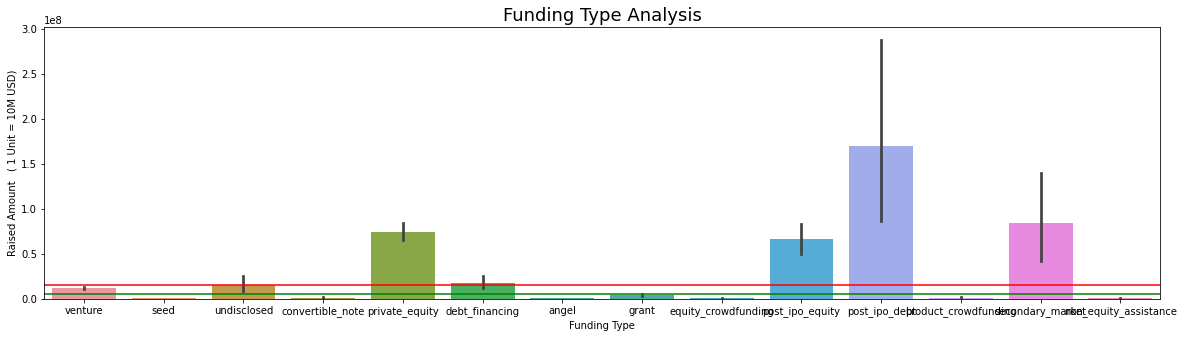

In [94]:

# bar plot with default statistic=mean
plt.figure(figsize=(20,5))
g=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame2)

g.set(xlabel='Funding Type', ylabel='Raised Amount   ( 1 Unit = 10M USD)')
g.set_title('Funding Type Analysis',fontsize =18)

plt.axhline(5000000, color='green')
plt.axhline(15000000, color='red')


plt.show()

**2.A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.**

In [99]:
venture_df = master_frame2[master_frame2["funding_round_type"]=="venture"]
venture_df.shape

(47809, 6)

In [100]:

venture_by_country = venture_df.groupby('country_code')
venture_by_country['raised_amount_usd'].sum().sort_values(ascending=False).head(9)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

In [102]:
#Filtering the data with these top 9 countries only.
top9 = venture_df[venture_df['country_code'].isin(["USA","CHN","GBR","IND","CAN","FRA","ISR","DEU","JPN"])]
top9=top9[~top9.category_list.isnull()]


In [104]:

top9['primary_sector'] =top9['category_list'].astype(str).apply(lambda x: x.split('|')[0])

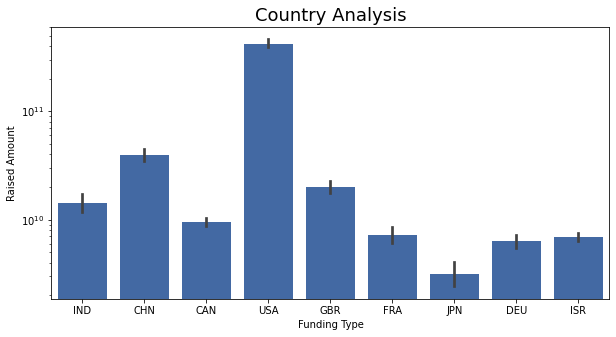

In [105]:

# bar plot with default statistic=mean
plt.figure(figsize=(10,5))
c=sns.barplot(x='country_code', y='raised_amount_usd', data=top9, estimator=np.sum,color=(0.2, 0.4, 0.7, 0.6))
#c.set_ylim(0, 100000000000)
c.set_yscale('log')
c.set(xlabel='Funding Type', ylabel='Raised Amount')
c.set_title('Country Analysis',fontsize =18)
plt.show()


A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type i.e venture).For this plot creating a master dataframe with all the data for the top 3 sectors of the top 3 countries.



**3.	A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).** 

In [106]:
master_D=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]
master_D.shape

(7964, 8)

In [107]:
master_D=master_D.append(D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index=True)

In [108]:

master_D.shape

(8372, 8)

In [109]:
master_D=master_D.append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)
master_D.shape

(8594, 8)

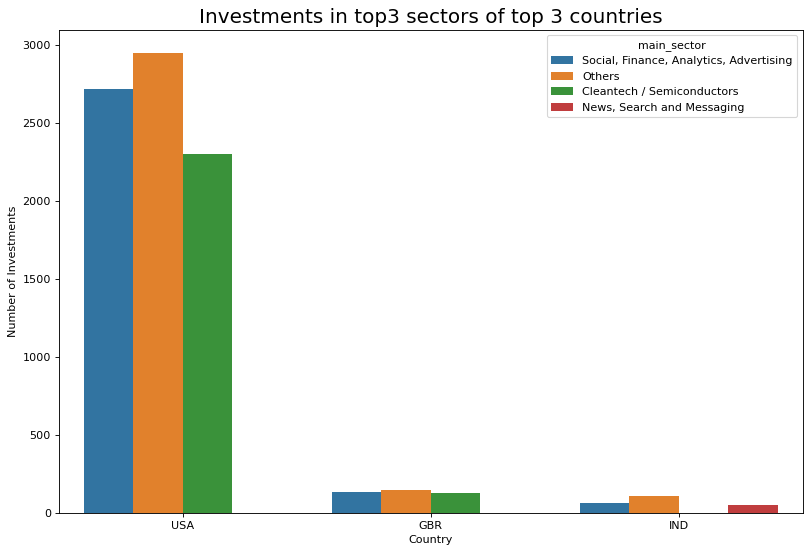

In [110]:

#Using the master_D dataframe to plot the sector wise investment count of the top 3 sectors of the top3 countries.

# set figure size for larger figure
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

# specify hue="categorical_variable"
s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=master_D,estimator=lambda x: len(x))
s.set(xlabel='Country', ylabel='Number of Investments')
s.set_title('Investments in top3 sectors of top 3 countries',fontsize =18)
plt.show()

## Conclusion :
#### Based on the data analysis performed, SparksFunds should invest in -

- Funding type - Venture.
- Countries - USA, Britain and India, respectively.
- Top two sectors to invest in are - Others and Social, Finance, Analytics, Advertising